Goals: 
- Deal with null data points   
- Clean the data (getting rid of the units)
- Data split (train / test)
- Save the clean data in data/processed 

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [231]:
file_loc = "../data/raw/Car details v3.csv"
df = pd.read_csv(file_loc)
#The data source is the following https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

df_count_raw = len(df)


In [232]:
df = df.drop_duplicates()
df_count_drop_duplicates = len(df)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [234]:
df.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [235]:
df.isnull().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.030032
engine           0.030032
max_power        0.029599
torque           0.030176
seats            0.030032
dtype: float64

Let's check if the none values are overlapping. That would justify dropping the null values.

In [236]:
#Look at the rows with null values
df[pd.isnull(df).any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7740,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [237]:
#These 209 rows have null values for muliple columns, so we will drop them
df=df.dropna()
df.info()

df_count_dropna = len(df)

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [238]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3862,Renault Duster 85PS Diesel RxL Optional,2012,400000,100000,Diesel,Individual,Manual,Second Owner,20.46 kmpl,1461 CC,83.8 bhp,200Nm@ 1900rpm,5.0
507,Ford Figo Petrol EXI,2012,300000,85000,Petrol,Individual,Manual,Second Owner,15.6 kmpl,1196 CC,70 bhp,102Nm@ 4000rpm,5.0
394,Toyota Innova 2.5 G1 Diesel 8-seater,2005,250000,240000,Diesel,Individual,Manual,Third Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
3962,Ford EcoSport 1.5 TDCi Trend Plus BSIV,2017,700000,60000,Diesel,Individual,Manual,First Owner,22.77 kmpl,1498 CC,98.59 bhp,205Nm@ 1750-3250rpm,5.0
4702,Toyota Corolla Altis Diesel D4DG,2010,450000,120000,Diesel,Individual,Manual,Second Owner,21.43 kmpl,1364 CC,87.2 bhp,205Nm@ 1800-2800rpm,5.0


The columns "selling_price", "km_driven", "year", and "seats" have float values. Therefore, no need to change those. The columns "mileage", "engine", and "max_power" have units. We may need to do unit conversion and coversion to float values. The "torque" column is weird, need to pay special attention. The columns "fuel", "seller_type", "transmission", and "owner" are categorical features.

First, we will work on the "engine", "mileage", and "max power" columns.

In [239]:
units_features = ["engine", "mileage", "max_power"]

for feature in units_features:
    print(df[feature].apply(lambda string : string.split(" ")[1]).unique())


['CC']
['kmpl' 'km/kg']
['bhp']


Mileage has two different units. Let's have a look at those.

In [240]:
#cond1: To see how many rows have km/kg
#cond2: To see how many rows have fuel CNG or LPG  
cond1 = df["mileage"].apply(lambda string : string.split(" ")[1]) == "km/kg"   
cond2 = (df["fuel"] == "CNG") | (df["fuel"] == "LPG")
print(len(df[cond1]))
print(len(df[cond2]))
print(len(df[cond1 & cond2]))
print(len(df[cond1])/len(df))
print(len(df) - len(df[cond1]))

86
86
86
0.012803334822093197
6631


There are only 1% of such values. The representation is too little. We will drop those.

In [241]:
#This is only one percent of data, we can drop corresponding rows

df=df.drop(df[cond1].index)
df_count_kmkg = len(df)

In [242]:
def drop_units(text : str) -> float :
    """Takes a value with units (eg. 125 bhp). Strips the units part and outputs the value"""

    return float(text.split(" ")[0])

Drop the units for engine and mileage columns.

In [243]:


for feature in units_features:
    
    df[feature]=df[feature].str.split().str[0].astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6631 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6631 non-null   object 
 1   year           6631 non-null   int64  
 2   selling_price  6631 non-null   int64  
 3   km_driven      6631 non-null   int64  
 4   fuel           6631 non-null   object 
 5   seller_type    6631 non-null   object 
 6   transmission   6631 non-null   object 
 7   owner          6631 non-null   object 
 8   mileage        6631 non-null   float64
 9   engine         6631 non-null   float64
 10  max_power      6631 non-null   float64
 11  torque         6631 non-null   object 
 12  seats          6631 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 725.3+ KB


Next, we will extract data from the torque values. Unfortunately, the torque values have different types of units. From the first glance, there is Nm (Newton-meter) and kgm (kg-meter) for the torque. Also, there are rpm vales. We would like to know the kind of units we are given.

The following function takes a string and returns the same string without any numbers.

In [244]:
def eat_numbers(text:str ) -> str:
    """Takes a string and outputs the same string without numbers. Example: "No 1 DJ" -> "No  DJ", "50kg" -> "kg" """
    return ''.join(["" if char.isdigit() else char for char in text])

assert(eat_numbers("No 1 DJ") == "No  DJ")
assert(eat_numbers("115Nm@ 3500-3600rpm") == "Nm@ -rpm")

import re 

def replace_numbers_with_star(text : str) -> str:
    """Takes a string replaces a number sequence with *. Example: "No 10 DJ" -> "No * DJ", "50kg over 500m" -> "*kg over *m" """
    new_text =  re.sub(r'\d+', '*', text)
    return new_text.replace('*.*', '*').replace(' ', '').lower()

replace_numbers_with_star("50kg over 500m")

'*kgover*m'

Let's check what units are there.

In [245]:
df["torque"].apply(replace_numbers_with_star).unique()

array(['*nm@*rpm', '*nm@*-*rpm', '*@*,*(kgm@rpm)', '*kgmat*-*rpm',
       '*kgm@*rpm', '*nm@*~*rpm', '*nmat*rpm', '*@*-*rpm', '*nm',
       '*kgmat*rpm', '*kgmat*,*rpm', '*@*-*(kgm@rpm)', '*nmat*-*rpm',
       '*@*,*-*,*(kgm@rpm)', '*nm(*kgm)@*rpm', '*nm@*-*', '*nm@*+/-*rpm',
       '*@*,*+/-*(nm@rpm)', '*@*-*', '*(*)@*', '*nm/*rpm', '*@*(kgm@rpm)',
       '*nm@*,*rpm', '*nm@*', '*/*', '*nmat*,*-*,*rpm'], dtype=object)

There are too many different types of units. Some have range and some dont. Some torque values are in NM whereas other are in kgm. For some rows, one of torque or rpm is missing. Therefore, as a group we decided to drop the column. One could extract reasonable information, but that is a separate project on its own.

In [246]:
df = df.drop("torque", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6631 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6631 non-null   object 
 1   year           6631 non-null   int64  
 2   selling_price  6631 non-null   int64  
 3   km_driven      6631 non-null   int64  
 4   fuel           6631 non-null   object 
 5   seller_type    6631 non-null   object 
 6   transmission   6631 non-null   object 
 7   owner          6631 non-null   object 
 8   mileage        6631 non-null   float64
 9   engine         6631 non-null   float64
 10  max_power      6631 non-null   float64
 11  seats          6631 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 673.5+ KB


Now lets check number of unique values for different categorical variables starting with names.

In [247]:
df["name"].nunique()  #This doesn't seem as a useful feature to include in price prediction 

1947

In [248]:
df["name"].str.split().str[0].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [249]:
df["name"].str.split().str[0].nunique()

31

In [250]:
df["brand"]=df["name"].str.split().str[0]
df["brand"]=df["brand"].replace({"Land":"Land Rover"})
print(df["brand"].nunique())
print(df["brand"].unique())
df = df.drop("name", axis=1)

31
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land Rover' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']


In [251]:
# #Knowing that the data was collected in 2020, a variable Age is added by subtracting the variabe year fron 2020.
# df['age']=2020-df['year']
# df.drop("year", axis=1)

df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6631 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6631 non-null   int64  
 1   selling_price  6631 non-null   int64  
 2   km_driven      6631 non-null   int64  
 3   fuel           6631 non-null   object 
 4   seller_type    6631 non-null   object 
 5   transmission   6631 non-null   object 
 6   owner          6631 non-null   object 
 7   mileage        6631 non-null   float64
 8   engine         6631 non-null   float64
 9   max_power      6631 non-null   float64
 10  seats          6631 non-null   float64
 11  brand          6631 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 673.5+ KB


<Figure size 1200x900 with 0 Axes>

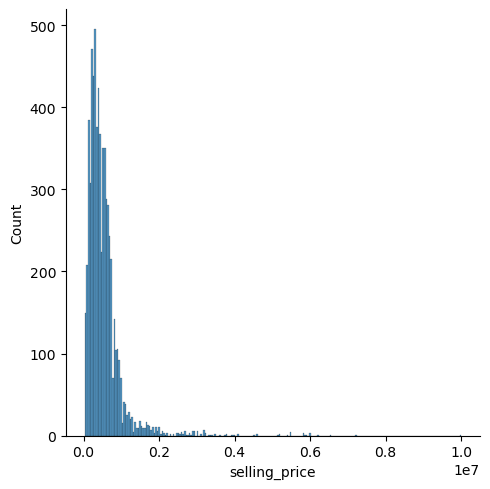

In [253]:
plt.figure(figsize=(8,6),dpi=150)
sns.displot(df["selling_price"])

In [254]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['selling_price'] < 4000000]
df_no_outliers_filter=(df['selling_price'] < 4000000)

print(f"The percent of selected outliers is: {(len(df)-len(df_no_outliers))/len(df)*100:.2f}%")

The percent of selected outliers is: 0.39%


(array([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

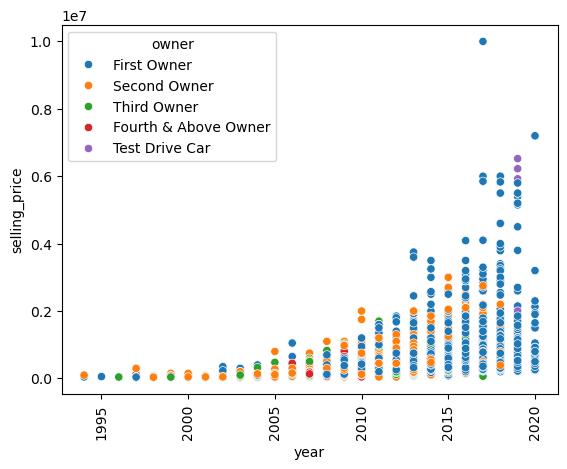

In [255]:
sns.scatterplot(data=df,x="year",y="selling_price",hue="owner")
plt.xticks(rotation=90)
#As expected the newer the car the less owners it had and higher selling price corresponds to newer cars

In [256]:
categorical_features = ["fuel", "seller_type", "transmission", "owner"]

for feature in categorical_features:
    print(df[feature].value_counts())
    print(" ")

fuel
Diesel    3658
Petrol    2973
Name: count, dtype: int64
 
seller_type
Individual          5939
Dealer               665
Trustmark Dealer      27
Name: count, dtype: int64
 
transmission
Manual       6056
Automatic     575
Name: count, dtype: int64
 
owner
First Owner             4126
Second Owner            1861
Third Owner              486
Fourth & Above Owner     153
Test Drive Car             5
Name: count, dtype: int64
 


In [257]:
#Selling price vs the year in which the car was bought shows that there are outliers that need to be removed
df_no_outliers = df[df['year'] > 2000]
print(f"The percent of selected outliers is: {(len(df)-len(df_no_outliers))/len(df)*100:.2f}%")

The percent of selected outliers is: 0.75%


([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

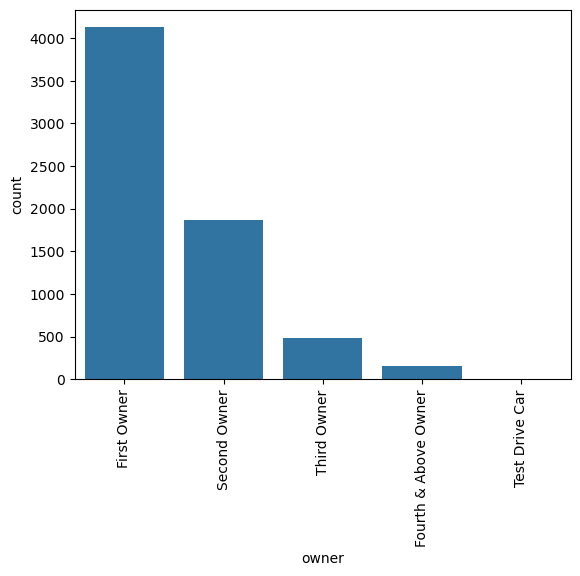

In [258]:
sns.countplot(data=df,x="owner")
plt.xticks(rotation=90)

In [259]:
df_test_drive=df[df["owner"]=="Test Drive Car"]
print(f"Percentage of test drive car: {len(df_test_drive)/len(df)*100:.2f}")

Percentage of test drive car: 0.08


In [260]:
#Since only 0.07% of data has "Test Drive Car" category in "owner" feature, we will drop corresponding rows
df=df[df["owner"]!="Test Drive Car"]
#We will also combine "Third owner" and "Fourth & Above Owners" Categories under "Third and above owners"
df["owner"]=df["owner"].replace({"Third Owner":"Third and above owners","Fourth & Above Owner":"Third and above owners"})

df_count_drop_test_drive = len(df)

C:\Users\parab\AppData\Local\Temp\ipykernel_17752\2108051768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["owner"]=df["owner"].replace({"Third Owner":"Third and above owners","Fourth & Above Owner":"Third and above owners"})


<Axes: xlabel='owner', ylabel='count'>

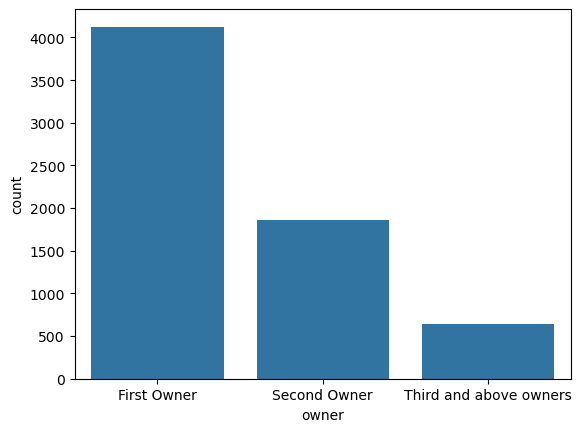

In [261]:
sns.countplot(data=df,x="owner")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Datsun'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes-Benz'),
  Text(13, 0, 'Mitsubishi'),
  Text(14, 0, 'Audi'),
  Text(15, 0, 'Volkswagen'),
  Text(16, 0, 'BMW'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Lexus'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Land Rover'),
  Text(21, 0, 'MG'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Daewoo'),
  Text(24, 0, 'Kia'),
  Text(25, 0, 'Fiat'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel')])

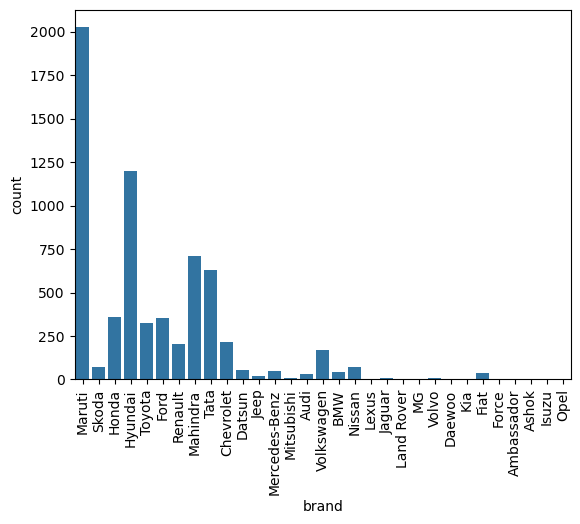

In [262]:
sns.countplot(data=df,x="brand")
plt.xticks(rotation=90)

In [263]:
#We will drop brand name from in further analysis as the brand "Maruti" dominates and most of the other brands are underrepresented
df=df.drop("brand",axis=1)

In [264]:
df_trustmark=df[df["seller_type"]=="Trustmark Dealer"]
len(df_trustmark)/len(df)*100

0.40748566254150315

In [265]:
df_dealer=df[df["seller_type"]=="Dealer"]
len(df_dealer)/len(df)*100

9.96076063990341

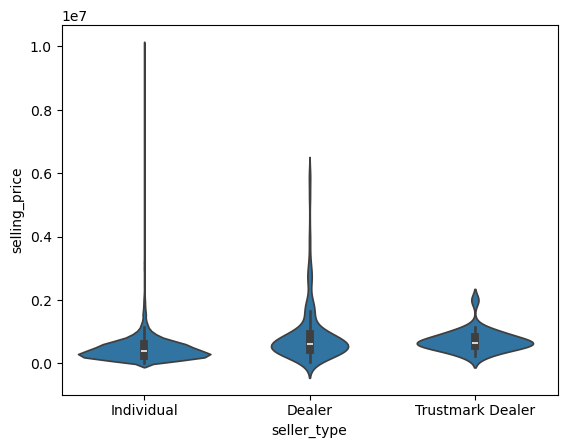

In [266]:
sns.violinplot(data=df,x="seller_type",y="selling_price")
plt.ylim=(0,7000000)
#the plot shows that the selling_price in average is higher for Dealer Seller Type than for individual,
#so this this categorical feature is infomaive however the categories are highly imbalanced with "Trustmark Dealer" 
#being only 0.4% of data and "Dealer" being only 10% data, for now we will unite "Trustmark Dealer" with "Dealer" 
#in model creation we should have in mind that "seller_type" is highely imbalanced

In [267]:
df["seller_type"]=df["seller_type"].replace({"Trustmark Dealer":"Dealer"})

<Axes: xlabel='seller_type', ylabel='count'>

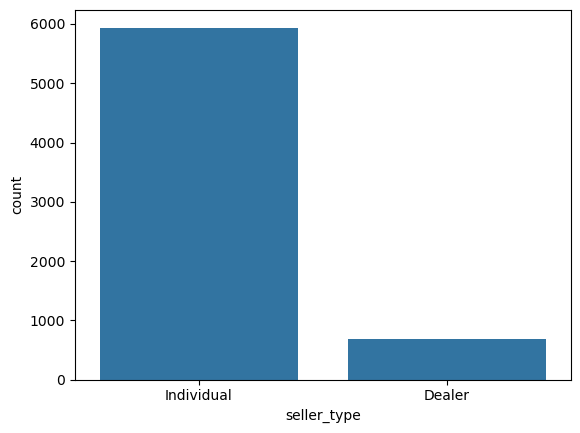

In [268]:
sns.countplot(data=df,x="seller_type")

<Axes: xlabel='fuel', ylabel='count'>

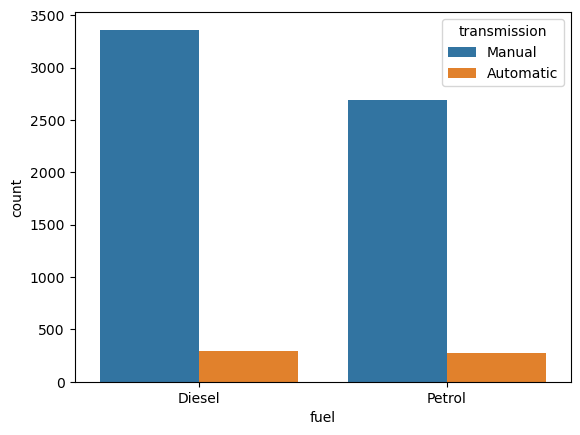

In [269]:
sns.countplot(data=df,x="fuel",hue="transmission")
#We can see that  Diesel and Petrol fuel usage is similar for  Automatic and Manual cars 

<Axes: xlabel='transmission', ylabel='count'>

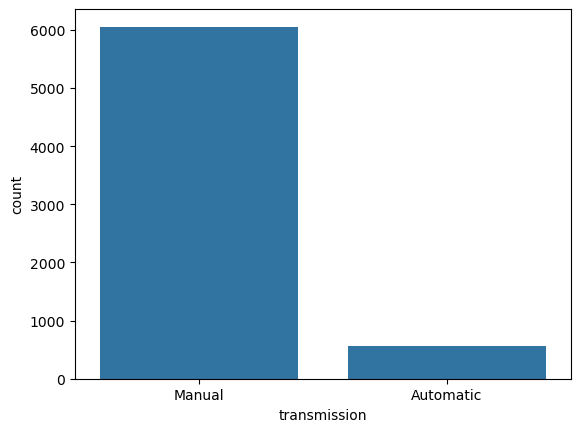

In [270]:
sns.countplot(data=df,x="transmission")

In [271]:
#Transmission is another highely imbalanced feature, onnly 8% of data has Automatic transmission
df_transmission=df[df["transmission"]=="Automatic"]
len(df_transmission)/len(df)*100

8.61756715967401

<Axes: xlabel='km_driven', ylabel='selling_price'>

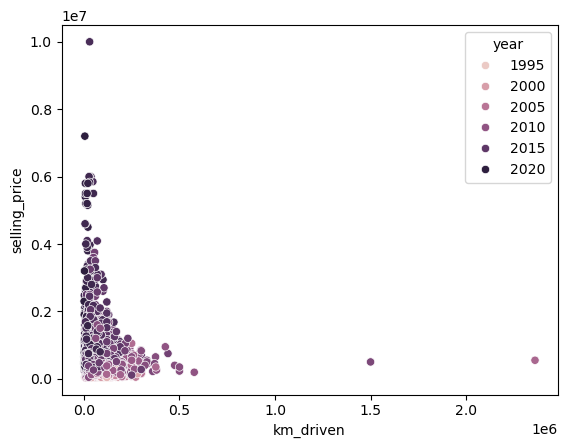

In [272]:
sns.scatterplot(data=df,x="km_driven",y="selling_price",hue="year")
#We can see that km_driven has some outliers

In [273]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['km_driven'] < 500000] 
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.07546030787805615

(-10000.0, 500000.0)

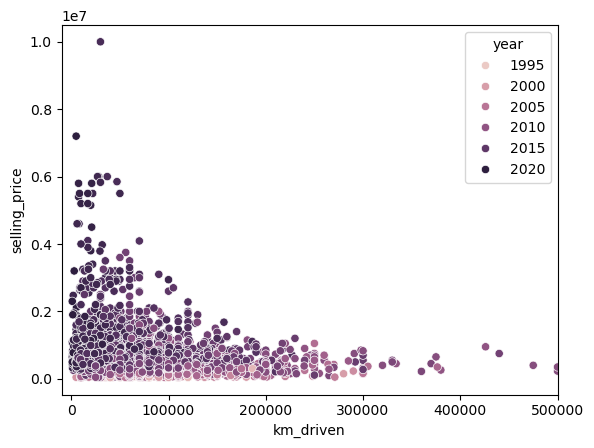

In [274]:
sns.scatterplot(data=df,x="km_driven",y="selling_price",hue="year")
plt.xlim(-10000,500000)
#We can see that the less km_driven and the newer the car, the more expensive it is

<Axes: xlabel='seats', ylabel='count'>

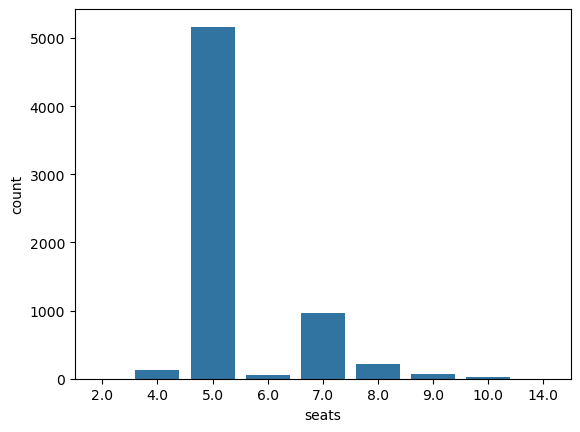

In [275]:
sns.countplot(data=df,x="seats")
#plt.savefig("Nseats.png")

In [276]:
#It is better to have to bins for number of seats >5 and seats<=5
bins=[0,5,15] #Interval bins
labels=["5 or less","more than 5"]
df['seat_category'] = pd.cut(df['seats'], bins=bins, labels=labels)
#We will keep this new column and drop seats column
df=df.drop("seats",axis=1)

<Axes: xlabel='seat_category', ylabel='count'>

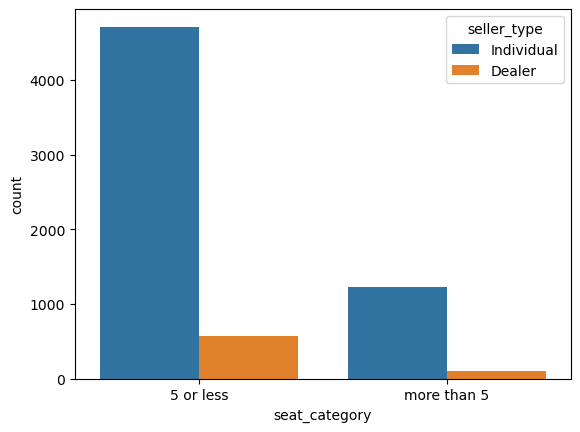

In [277]:
sns.countplot(data=df,x="seat_category",hue="seller_type")

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6626 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6626 non-null   int64   
 1   selling_price  6626 non-null   int64   
 2   km_driven      6626 non-null   int64   
 3   fuel           6626 non-null   object  
 4   seller_type    6626 non-null   object  
 5   transmission   6626 non-null   object  
 6   owner          6626 non-null   object  
 7   mileage        6626 non-null   float64 
 8   engine         6626 non-null   float64 
 9   max_power      6626 non-null   float64 
 10  seat_category  6626 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 576.0+ KB


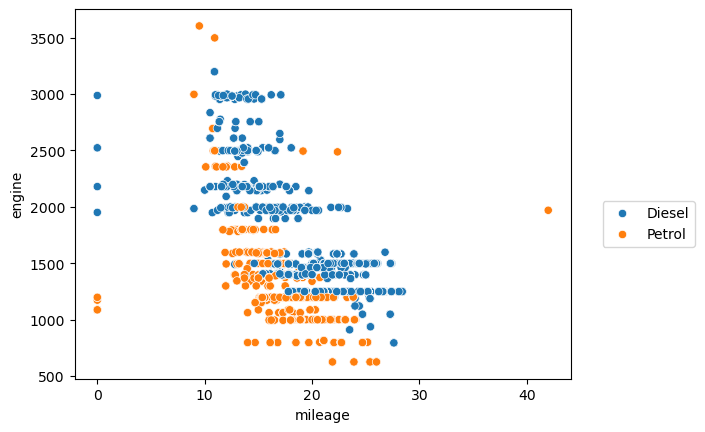

In [279]:
#mileage of the car vs engine capacity
sns.scatterplot(data=df,x="mileage",y="engine",hue="fuel")
plt.legend(bbox_to_anchor=(1.05, 0.5))

In [280]:
#It looks like the cars with engine capacity>2000 Cubic Capacity mostly use Diesel
#We will also remove outliers in mileage

In [281]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[(df['mileage'] > 5) & (df['mileage'] < 40)]
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.24147298520977964

<Axes: xlabel='transmission', ylabel='max_power'>

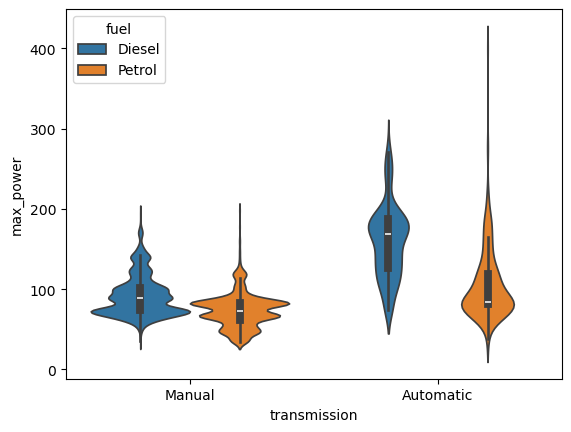

In [282]:
sns.violinplot(data=df,y="max_power",x="transmission",hue="fuel")
#It looks like max_power in average is higher for Automatic transmission
#Lets remove the outliers in max_power

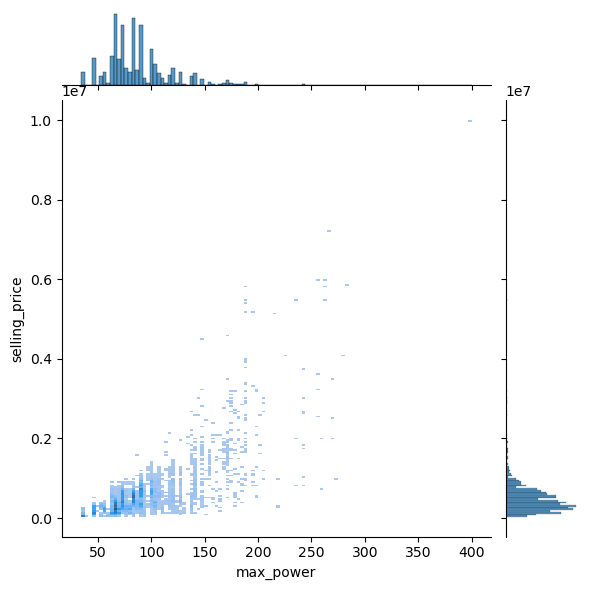

In [283]:
sns.jointplot(data=df,y="selling_price",x="max_power",kind="hist")
#we can see a correlation, the cars with small max_power have cheaper price

In [284]:
#Now lets remove all the outliers we discussed above

df_no_outliers_filter=(df['selling_price'] < 4000000)
df_no_outliers_filter=df_no_outliers_filter & (df['year'] > 2000)
df_no_outliers_filter=df_no_outliers_filter & (df['km_driven'] < 500000)
df_no_outliers_filter=df_no_outliers_filter & (df['mileage'] > 5) & (df['mileage'] < 40)
df_no_outliers_filter=df_no_outliers_filter & (df["max_power"]<300)

In [285]:
print(f"This removes {(len(df)-len(df[df_no_outliers_filter]))/len(df) *100:.2f} percent of data")

This removes 1.40 percent of data


In [286]:
df=df[df_no_outliers_filter]
df_count_no_outliers = len(df)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6533 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6533 non-null   int64   
 1   selling_price  6533 non-null   int64   
 2   km_driven      6533 non-null   int64   
 3   fuel           6533 non-null   object  
 4   seller_type    6533 non-null   object  
 5   transmission   6533 non-null   object  
 6   owner          6533 non-null   object  
 7   mileage        6533 non-null   float64 
 8   engine         6533 non-null   float64 
 9   max_power      6533 non-null   float64 
 10  seat_category  6533 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 567.9+ KB


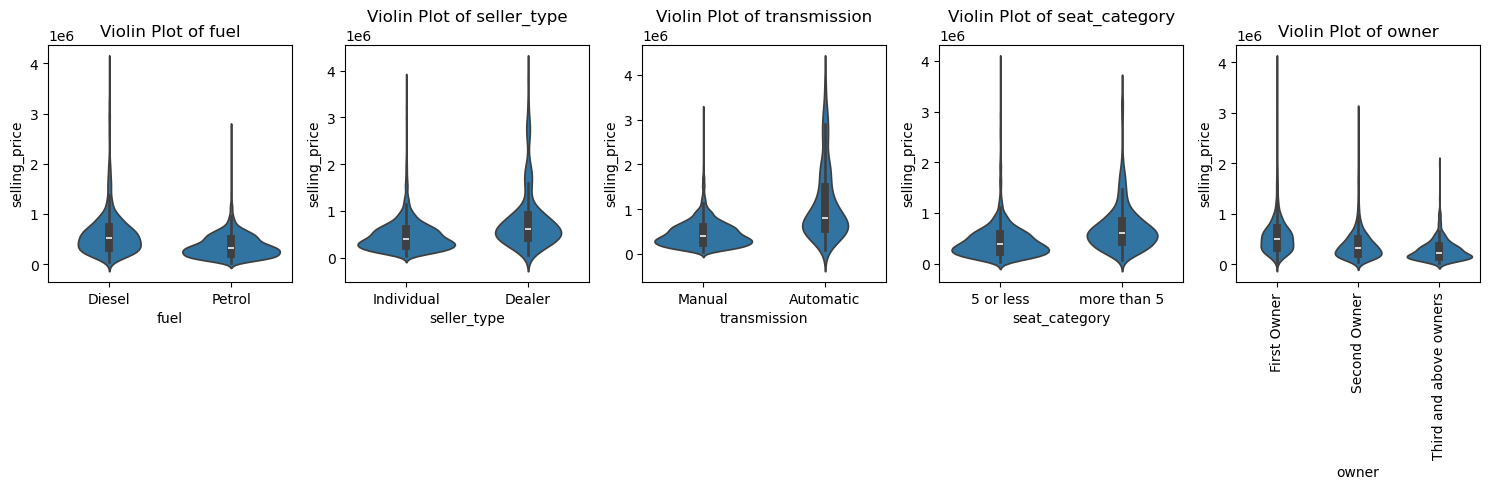

In [287]:
#Lets look at violin plots for categorical variables.

categorical_features = ["fuel", "seller_type", "transmission", "seat_category", "owner"]

# Set up subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Plot violin plots in each subplot
for index in range(len(categorical_features)):
    feature = categorical_features[index]
    sns.violinplot(x=feature, y='selling_price', data=df, ax=axes[index])
    axes[index].set_title(f'Violin Plot of {feature}')
    plt.xticks(rotation=90)


# Show plot

plt.tight_layout()
plt.show()

In [288]:
#Now lets use one-hot encoding for categorical variables
df_corr=pd.get_dummies(df).corr()["selling_price"]

In [289]:
df_corr

year                            0.490407
selling_price                   1.000000
km_driven                      -0.199657
mileage                        -0.125914
engine                          0.474068
max_power                       0.692039
fuel_Diesel                     0.299736
fuel_Petrol                    -0.299736
seller_type_Dealer              0.238326
seller_type_Individual         -0.238326
transmission_Automatic          0.442351
transmission_Manual            -0.442351
owner_First Owner               0.266818
owner_Second Owner             -0.169812
owner_Third and above owners   -0.180918
seat_category_5 or less        -0.255084
seat_category_more than 5       0.255084
Name: selling_price, dtype: float64

In [290]:
df_corr_plot=df_corr.drop("selling_price").sort_values()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'transmission_Manual'),
  Text(1, 0, 'fuel_Petrol'),
  Text(2, 0, 'seat_category_5 or less'),
  Text(3, 0, 'seller_type_Individual'),
  Text(4, 0, 'km_driven'),
  Text(5, 0, 'owner_Third and above owners'),
  Text(6, 0, 'owner_Second Owner'),
  Text(7, 0, 'mileage'),
  Text(8, 0, 'seller_type_Dealer'),
  Text(9, 0, 'seat_category_more than 5'),
  Text(10, 0, 'owner_First Owner'),
  Text(11, 0, 'fuel_Diesel'),
  Text(12, 0, 'transmission_Automatic'),
  Text(13, 0, 'engine'),
  Text(14, 0, 'year'),
  Text(15, 0, 'max_power')])

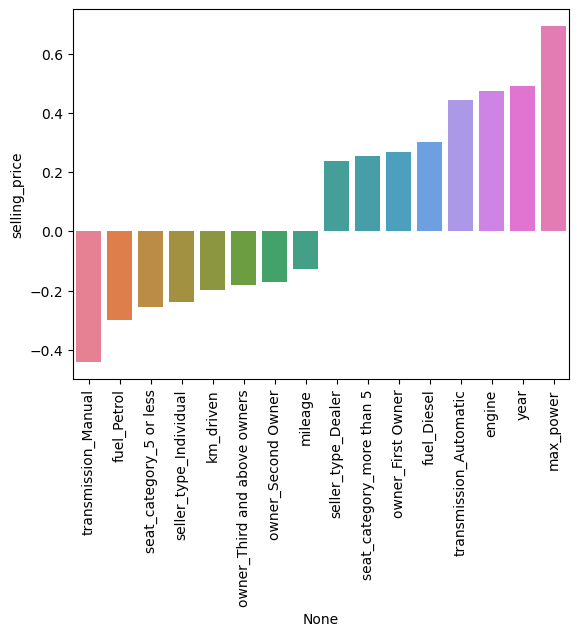

In [291]:
sns.barplot(x=df_corr_plot.index,y=df_corr_plot,hue=df_corr_plot.index)
plt.xticks(rotation=90)
# plt.savefig("salesprice_corr.png",bbox_inches="tight")

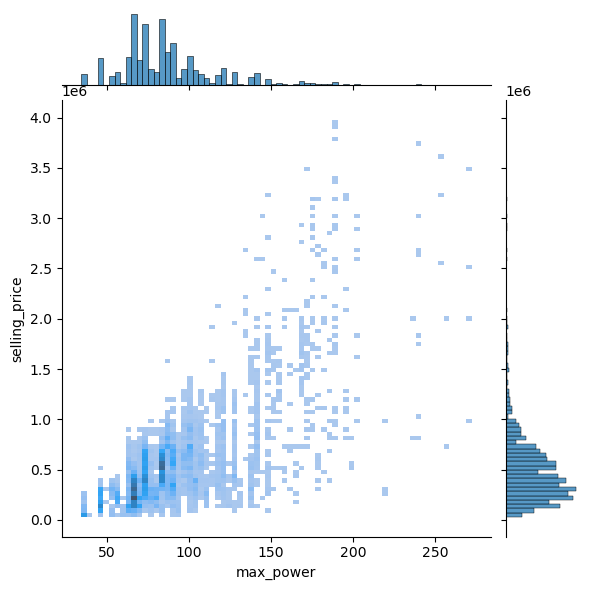

In [292]:
#We can see the features with highest correlations with "Selling_price" on the very left and right sides,
#where max_power shows the highest correlation
#second highest correlation is with year and third highest with engine
sns.jointplot(data=df,y="selling_price",x="max_power",kind="hist")
#plt.savefig("salesprice_maxpower.png")

<Axes: xlabel='max_power', ylabel='selling_price'>

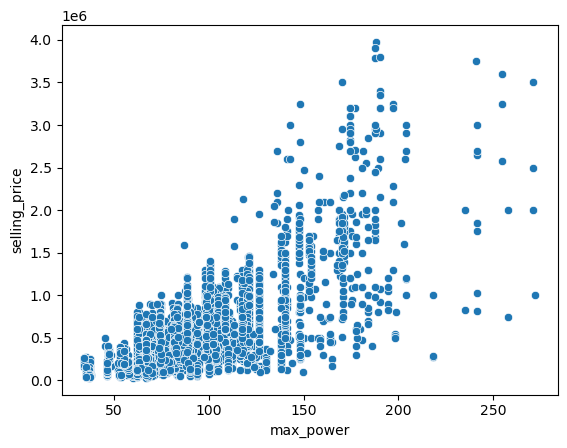

In [293]:
sns.scatterplot(data=df,y="selling_price",x="max_power")

<Axes: xlabel='engine', ylabel='selling_price'>

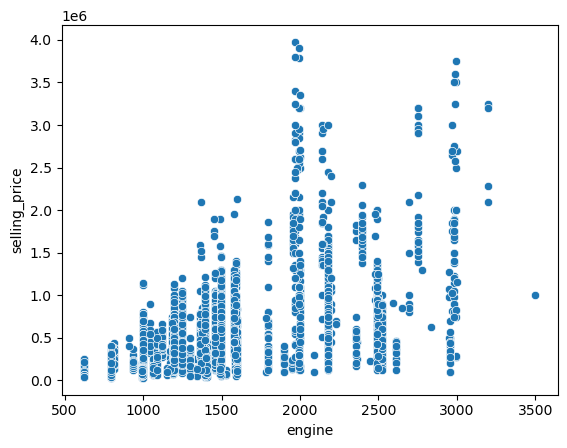

In [294]:
sns.scatterplot(data=df,y="selling_price",x="engine")

<Axes: >

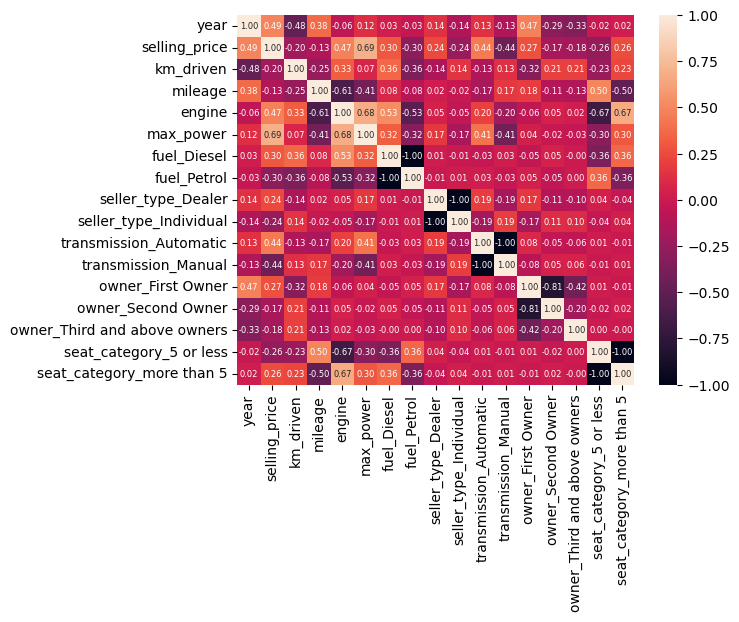

In [295]:
sns.heatmap(pd.get_dummies(df).corr(),annot=True,annot_kws={"size": 6},fmt='.2f')
#plt.savefig("2D_corr.png",bbox_inches='tight')

In [296]:
# We can see that features with high correlations
#max_power and engine
#Engine and milage
#max_power vs milage
#engine with fuel type
#seat_category and engine
#year and km driven 

<Axes: xlabel='max_power', ylabel='engine'>

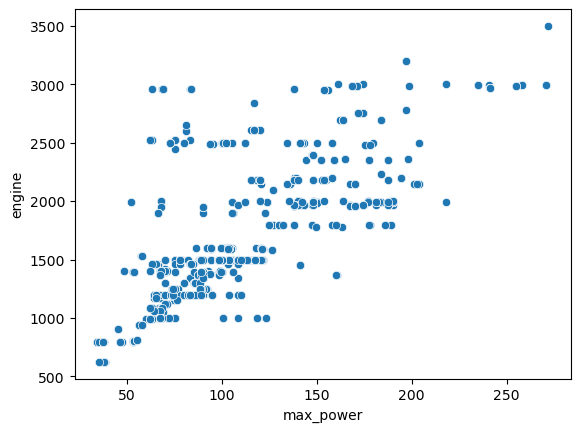

In [297]:
sns.scatterplot(data=df,y="engine",x="max_power")

<Axes: xlabel='mileage', ylabel='engine'>

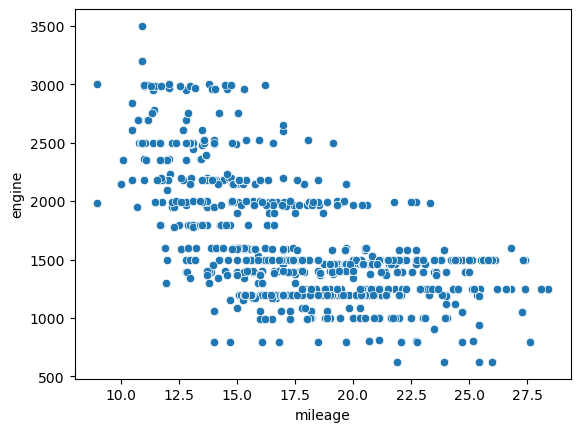

In [298]:
sns.scatterplot(data=df,y="engine",x="mileage")

<Axes: xlabel='mileage', ylabel='max_power'>

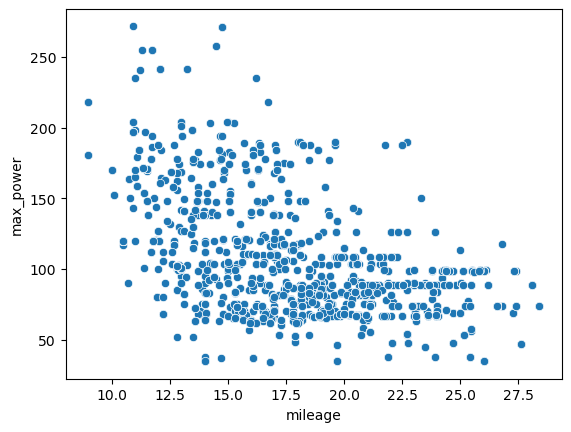

In [299]:
sns.scatterplot(data=df,y="max_power",x="mileage")

<Axes: xlabel='year', ylabel='km_driven'>

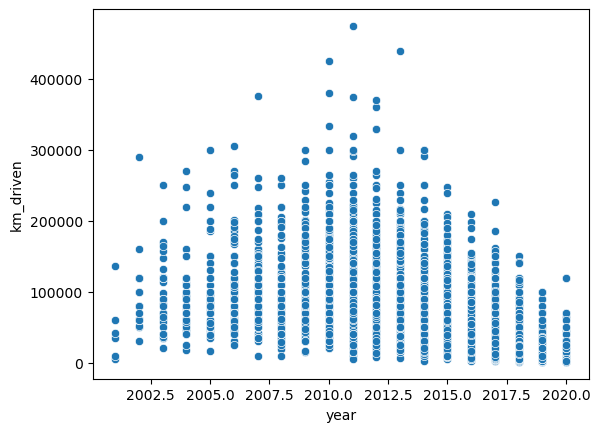

In [300]:
sns.scatterplot(data=df,y="km_driven",x="year")

In [301]:
# For features with high correlation > 0.7 , we only keep one of them.
# There are none such

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6533 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6533 non-null   int64   
 1   selling_price  6533 non-null   int64   
 2   km_driven      6533 non-null   int64   
 3   fuel           6533 non-null   object  
 4   seller_type    6533 non-null   object  
 5   transmission   6533 non-null   object  
 6   owner          6533 non-null   object  
 7   mileage        6533 non-null   float64 
 8   engine         6533 non-null   float64 
 9   max_power      6533 non-null   float64 
 10  seat_category  6533 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 567.9+ KB


In [303]:
df=pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6533 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6533 non-null   int64  
 1   selling_price                 6533 non-null   int64  
 2   km_driven                     6533 non-null   int64  
 3   mileage                       6533 non-null   float64
 4   engine                        6533 non-null   float64
 5   max_power                     6533 non-null   float64
 6   fuel_Petrol                   6533 non-null   bool   
 7   seller_type_Individual        6533 non-null   bool   
 8   transmission_Manual           6533 non-null   bool   
 9   owner_Second Owner            6533 non-null   bool   
 10  owner_Third and above owners  6533 non-null   bool   
 11  seat_category_more than 5     6533 non-null   bool   
dtypes: bool(6), float64(3), int64(3)
memory usage: 395.6 KB


In [304]:
print(f"We start with {df_count_raw} data points")
print(f"Then we remove duplicated rows, which drops entries to {df_count_drop_duplicates} (removes {(df_count_raw-df_count_drop_duplicates)/df_count_raw*100:.2f} %).")
print(f"We then remove {df_count_drop_duplicates-df_count_dropna} rows with missing values for multiple columns, we are left with {df_count_dropna} entries ({(df_count_drop_duplicates-df_count_dropna)/df_count_drop_duplicates*100:.2f}% data removed).")
print(f"We then remove {df_count_dropna-df_count_kmkg} rows corresponding to 'LPG' and 'CNG' underrepresented gas fuel types and this leaves {df_count_kmkg} enries ({(df_count_dropna-df_count_kmkg)/df_count_kmkg*100:.2f}% data removed).")
print(f"We then remove {df_count_kmkg-df_count_drop_test_drive} rows corresponding to 'Test Drive Car' of Owner category, and get {df_count_drop_test_drive} entries ({(df_count_kmkg-df_count_drop_test_drive)/df_count_kmkg*100:.2f}% data removed).")
print(f"After removing {df_count_drop_test_drive-df_count_no_outliers} outliers rows we are left with {df_count_no_outliers} rows ({(df_count_drop_test_drive-df_count_no_outliers)/df_count_drop_test_drive*100:.2f}% data removed).")
print(f"Therefore, overall we started with {df_count_raw} rows of raw data. Out of which {df_count_raw-df_count_drop_duplicates} rows were duplicated. Thus, we had {df_count_drop_duplicates} rows of actual data. Then, we removed {df_count_drop_duplicates-df_count_no_outliers} rows to get {df_count_no_outliers} rows of final data ({(df_count_drop_duplicates-df_count_no_outliers)/df_count_drop_duplicates*100:.2f}% data removed).")

We start with 8128 data points
Then we remove duplicated rows, which drops entries to 6926 (removes 14.79 %).
We then remove 209 rows with missing values for multiple columns, we are left with 6717 entries (3.02% data removed).
We then remove 86 rows corresponding to 'LPG' and 'CNG' underrepresented gas fuel types and this leaves 6631 enries (1.30% data removed).
We then remove 5 rows corresponding to 'Test Drive Car' of Owner category, and get 6626 entries (0.08% data removed).
After removing 93 outliers rows we are left with 6533 rows (1.40% data removed).
Therefore, overall we started with 8128 rows of raw data. Out of which 1202 rows were duplicated. Thus, we had 6926 rows of actual data. Then, we removed 393 rows to get 6533 rows of final data (5.67% data removed).


In [313]:
data_count = [df_count_raw, df_count_drop_duplicates, df_count_dropna, df_count_kmkg, df_count_drop_test_drive, df_count_no_outliers]

data_process = ["Remove Duplicates", "Remove Null", "Remove km/kg", "Remove Test Drive Car", "Remove Outliers"]

data_header = ["Process", "Initial Rows", "Rows Removed", "Final Rows", "Percentage Removed"]

# Define column widths
col_widths = [30, 15, 15, 15, 15]

# Print header row
header = f"{data_header[0]:<{col_widths[0]}} {data_header[1]:<{col_widths[1]}} {data_header[2]:<{col_widths[2]}} {data_header[3]:<{col_widths[3]}} {data_header[4]:<{col_widths[4]}}"
print(header)
print("-" * (sum(col_widths) + 2))

# Print data rows
for index in range(len(data_process)):
    print(f"{data_process[index]:<{col_widths[0]}} {data_count[index]:<{col_widths[1]}} {data_count[index] - data_count[index + 1]:<{col_widths[2]}} {data_count[index + 1]:<{col_widths[3]}} {(data_count[index] - data_count[index + 1])/data_count[index]*100:.2f}%")


Process                        Initial Rows    Rows Removed    Final Rows      Percentage Removed
--------------------------------------------------------------------------------------------
Remove Duplicates              8128            1202            6926            14.79%
Remove Null                    6926            209             6717            3.02%
Remove km/kg                   6717            86              6631            1.28%
Remove Test Drive Car          6631            5               6626            0.08%
Remove Outliers                6626            93              6533            1.40%


In [306]:
# We start with 8128 data points (rows)
# Then we remove duplicated rows, which drops entries to ?? (removes 15 %).
# We then remove 215 rows with missing values for multiple columns, we are left with ?? entries (2.6 % less statistics). 
# We then remove 1.1% of these corresponding to "LPG" and "CNG" underrepresented gas fuel types and this leaves ?? enries.
# We then remove 0.07% data corresponding to "Test Drive Car" of Owner category, and get ?? entries.
# After removing outliers (1.4 percent of remaining data) we are left with 6533 data points.